In [1]:
import numpy as np
import pandas as pd
import sympy as sym
from scipy import constants
import matplotlib.pyplot as plt

In [2]:
def Search4Max(df,vecref):
    for i in range(len(df["Gray_Value"])):
        if df["Gray_Value"][i] == np.max(vecref):
            maxin = i
    return maxin

def lenght_between(dlambda, dpixels, pixels):
    return (dlambda/dpixels)*pixels

def build_line(x, y):
    factor = (y[1] - y[0])/(x[1] - x[0])
    weight = y[1] - factor*x[1]
    return factor, weight

def transform(x, y, px):
    m, b = build_line(x, y)
    return m*px + b

In [3]:
path = "C:/Users/Darck/Modern_Phy_Lab/4 Efecto Zeeman/data/CSV/"

# Información relativa al Cadmio:
Neon_parallel = pd.read_csv(path + "Ne_conB_paral_10s.csv")
Neon_perpend = pd.read_csv(path + "Ne_conB_perp_10s.csv")
Neon_Argon = pd.read_csv(path + "Calib_NeAr_10s.csv")

axis = Neon_perpend["Distance_(pixels)"].to_numpy()

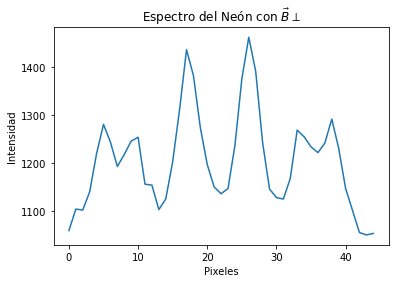

In [242]:
init, final = 0, 45
Ne_perpend = Neon_perpend["Gray_Value"].to_numpy()[init:final]

plt.plot(axis[init:final], Ne_perpend)
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title(r"Espectro del Neón con $\vec{B} \perp$")
plt.savefig("Neón_Perp.pdf")

In [5]:
px_sigma1, px_sigma2, px_pi1, px_pi2, px_sigma3, px_sigma4 = 5, 10, 17, 26, 33, 38

In [6]:
Ar_line = 723.3606e-9 # metros
Ne_line = 724.516e-9 # metros
NeAr = Neon_Argon["Gray_Value"].to_numpy()

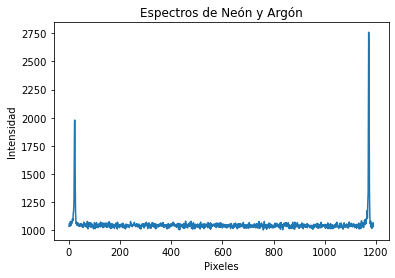

In [241]:
plt.plot(axis, NeAr)
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectros de Neón y Argón")
plt.savefig("Neón_Argón.pdf")

In [8]:
max_Ar = Search4Max(Neon_Argon,NeAr[600:])
max_Ne = Search4Max(Neon_Argon,NeAr[0:600])
x, y = [max_Ne, max_Ar], [Ne_line, Ar_line]

-1.0055700609225251e-12

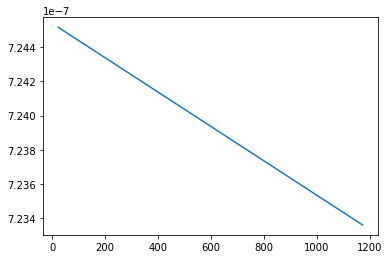

In [9]:
plt.plot(x, y)
factor, weight = build_line(x, y)
factor

In [10]:
pi1 = transform(x, y, px_pi1)
pi2 = transform(x, y, px_pi2)
sigma1 = transform(x, y, px_sigma1)
sigma2 = transform(x, y, px_sigma2)
sigma3 = transform(x, y, px_sigma3)
sigma4 = transform(x, y, px_sigma4)
l = np.array([sigma1, sigma2, pi1, pi2, sigma3, sigma4]) # Las líneas no están equiespaciadas...
l

array([7.24534100e-07, 7.24529072e-07, 7.24522033e-07, 7.24512983e-07,
       7.24505944e-07, 7.24500916e-07])

In [11]:
distance = factor*(np.abs(0.5*(px_pi1 + px_pi2) - (px_sigma1 + px_sigma2)) + np.abs(0.5*(px_pi1 + px_pi2) - (px_sigma4 + px_sigma3)))/2 # Esta cosa está en Angstroms si le quitas el e-10.
distance

-2.8155961705830704e-11

In [12]:
h = constants.h
c = constants.c
mub = (constants.e*constants.hbar)/(2*constants.electron_mass)
B = 0.8465358537967054

In [13]:
f_pi1 = c/pi1
f_pi2 = c/pi2
f_sigma1 = c/sigma1
f_sigma2 = c/sigma2
f_sigma3 = c/sigma3
f_sigma4 = c/sigma4
f_Ne = c/Ne_line
f = np.array([f_sigma1, f_sigma2, f_pi1, f_pi2, f_sigma3, f_sigma4])

In [14]:
Energy = np.array([])

for i in l:
    Energy = np.append((h*c)/i, Energy)
    
"En eV:", Energy*1/1.60217653e-19, "En J:", Energy

('En eV:',
 array([1.71130503, 1.71129316, 1.71127653, 1.71125516, 1.71123853,
        1.71122665]),
 'En J:',
 array([2.74181276e-19, 2.74179373e-19, 2.74176709e-19, 2.74173285e-19,
        2.74170621e-19, 2.74168718e-19]))

In [53]:
dE = np.array([])

for i in range(1, 6):
    deltaE = (Energy[i] - Energy[i - 1])
    dE = np.append(dE, deltaE)

dE/(mub*B)

array([-0.24236241, -0.33930172, -0.43623538, -0.33928665, -0.24234357])

In [16]:
print((h*c)/Ne_line * 1/(mub*B))

34923.344764605834


In [17]:
N1 = {"3/2 -> 1/2": np.abs(Energy[5] - Energy[3]), "1/2 -> -1/2": np.abs(Energy[4] - Energy[2]), "-1/2 -> -3/2": np.abs(Energy[2] - Energy[0])}
N2 = {"1/2 -> -1/2": (Energy[0] - Energy[1], Energy[4] - Energy[5], Energy[2] - Energy[3])}

N1, N2

({'3/2 -> 1/2': 4.5662521026754904e-24,
  '1/2 -> -1/2': 6.0884544386721824e-24,
  '-1/2 -> -3/2': 4.566518288679037e-24},
 {'1/2 -> -1/2': (1.90273443962675e-24,
   1.9025865584922695e-24,
   3.4247888944889615e-24)})

In [18]:
(N1["1/2 -> -1/2"])/(mub*B), 4/5

(0.7755220317927679, 0.8)

In [19]:
(Energy[2] - Energy[3])/(mub*B) , 2/3

(0.4362353810262934, 0.6666666666666666)

In [76]:
inc_m = np.abs(factor*1)
inc_m

1.0055700609225251e-12

In [99]:
def GetPropagation(expr,vars,sigmas,measures):
    prop = 0
    for i in range(len(measures)):
        prop += expr.diff(var[i])**2 * sigmas[i]**2
    
    sigma = sym.sqrt(prop)
    #Sección para soltar el valor calculado y la incertidumbre del valor calculado. 

    sigma = sym.lambdify(var,sigma)
    mean = sym.lambdify(var,exp)
    return mean(*measures),sigma(*measures)

def New_Inc(inc1, inc2):
    return np.sqrt(inc1**2 + inc2**2)

In [107]:
vars = "lambda"
var = sym.symbols(vars)
var = np.array([var])

value_inc = np.array([])
sig = np.array([inc_m])
exp = (h*c)/var[0]
inc = np.array([])

for i in range(len(l)):
    mea = np.array([l[i]])
    data = GetPropagation(exp,var,sig,mea)
    value_inc = np.append(value_inc, data[0])
    inc = np.append(inc, data[1])

In [129]:
Energy_ = value_inc

N1_ = {"3/2 -> 1/2": (np.abs(Energy_[5] - Energy_[3]), r"$\pm$", New_Inc(inc[5], inc[3])), 
       "1/2 -> -1/2": (np.abs(Energy_[4] - Energy_[2]), r"$\pm$", New_Inc(inc[4], inc[2])), 
       "-1/2 -> -3/2": (np.abs(Energy_[2] - Energy_[0]), r"$\pm$", New_Inc(inc[2], inc[0]))}
N1_


{'3/2 -> 1/2': (4.566518288679037e-24, '$\\pm$', 5.38169341541671e-25),
 '1/2 -> -1/2': (6.088572743541248e-24, '$\\pm$', 5.3815888460660915e-25),
 '-1/2 -> -3/2': (4.5662521026754904e-24, '$\\pm$', 5.381379712154163e-25)}

In [133]:
N2_ = {"1/2 -> -1/2": ((Energy_[0] - Energy_[1], New_Inc(inc[0], inc[1])), 
                       (Energy_[4] - Energy_[5], New_Inc(inc[4], inc[5])), 
                       (Energy_[2] - Energy_[3], New_Inc(inc[2], inc[3])))}

N2_

{'1/2 -> -1/2': ((-1.9025865584922695e-24, 5.3813274294018905e-25),
  (-1.90273443962675e-24, 5.381745700418518e-25),
  (-3.4247888944889615e-24, 5.381536559540345e-25))}

In [152]:
valor = 0
incertidumbre = 0

for i in N2_["1/2 -> -1/2"]:
    valor += i[0]
    incertidumbre += i[1]**2

valor_ = valor/3
incertidumbre_ = np.sqrt(incertidumbre)

valor_, r"$\pm$", incertidumbre_

(-2.410036630869327e-24, '$\\pm$', 9.321094754806203e-25, numpy.float64)

In [156]:
sig = np.array([incertidumbre_])
exp = var[0]/(mub*B)
mea = np.array([valor_])

GetPropagation(exp,var,sig,mea), 2/3

((-0.3069804534949247, 0.118728232519331), 0.6666666666666666)

In [158]:
sig = np.array([New_Inc(inc[2], inc[3])])
exp = var[0]/(mub*B)
mea = np.array([Energy_[2] - Energy_[3]])

GetPropagation(exp,var,sig,mea), 2/3

((-0.43623538102629256, 0.0685477769253371), 0.6666666666666666)

In [164]:
valor = 0
incertidumbre = 0

for i in N1_.values():
    valor += i[0]
    incertidumbre += i[2]**2

valor_ = valor/3
incertidumbre_ = np.sqrt(incertidumbre)

valor_, r"$\pm$", incertidumbre_

(5.073781044965259e-24, '$\\pm$', 9.321124939191995e-25)

In [167]:
sig = np.array([incertidumbre_])
exp = var[0]/(mub*B)
mea = np.array([valor_])

GetPropagation(exp,var,sig,mea), 4/5

((0.646277150383213, 0.118728616995497), 0.8)

In [169]:
sig = np.array([New_Inc(inc[4], inc[2])])
exp = var[0]/(mub*B)
mea = np.array([Energy_[4] - Energy_[2]])

GetPropagation(exp,var,sig,mea), 4/5

((0.7755371009754881, 0.0685484429293795), 0.8)

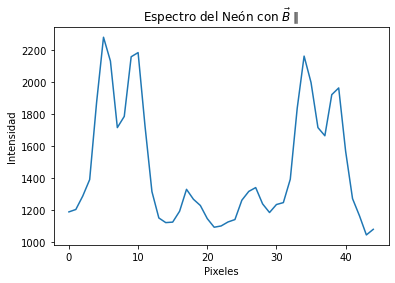

In [240]:
init, final = 0, 45
Ne_parallel = Neon_parallel["Gray_Value"].to_numpy()[init+121:final+121]

plt.plot(axis[init:final], Ne_parallel)
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title(r"Espectro del Neón con $\vec{B} \parallel$")
plt.savefig("Neón_Paral.pdf")